# <center>Organizaci&oacute;n de Datos 75.06/95.58</center>
## <center>Trabajo Practico N°1</center>
### <center> Grupo 25</center>

# Carga de librerías

In [ ]:
#Agregamos librerias a utilizar
import numpy as np 
import pandas as pd
#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


# Carga de datos

Cargamos el dataset desde el repositorio y mostramos los primeros 5 registros

In [ ]:
dataset=pd.read_csv("https://drive.google.com/uc?export=download&id=1sGSkfm-Su-Mk_Ib_u1M8DOUfpSLpPfz1")
dataset.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,115.5,0,1,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,0,BB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,42.0,1,0,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,0,BB,CHE,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,229.0,0,2,Check-Out,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,154.0,NaN,0,Transient,75.0,0,0,Canceled,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,Check-Out,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


# Analisis Básico

Obtenemos las caracteristicas basicas del data set: Tamaño (Filas y columnas) y tipo de dato por columna

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

Dado que nuestra *target* variable es **is_canceled** verificamos que nuestro dataset este balanceado con cantidades significativas de todos los casos.

In [ ]:
dataset["is_canceled"].value_counts()

0    30972
1    30941
Name: is_canceled, dtype: int64

La variable **is_canceled** es binaria y notamos iguales cantidades de 0 y 1 por lo que podemos avanzar.

Calculamos valores basicos de las variables cuantitativas (media, mediana, moda, desvío estandar, y cuantiles 0.25, 0.5, 0.75) con el metodo .describe()


In [ ]:
dataset.describe(include=[np.number])

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,54023.000000,3152.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.027991,0.114790,0.115420,0.195952,84.541010,188.539340,2.638977,102.383773,0.049957,0.523703,0.499750
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.164948,0.993723,1.396359,0.610519,109.523772,129.457025,18.619092,47.757640,0.221023,0.775412,0.500004
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,70.000000,0.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,179.000000,0.000000,95.000000,0.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,270.000000,0.000000,126.000000,0.000000,1.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,1.000000,26.000000,70.000000,17.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000,1.000000


Realizamos mismo analisis para variables cualitativas, obteniendo la cantidad de elementos unicos, el elemento más frecuente y la cantidad de veces que se muestra en el dataset.

In [ ]:
dataset.describe(include = [object])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,id
count,61913,61913,61913,61692,61913,61913,61913,61913,61913,61913,61913,61913,61913
unique,2,12,5,149,8,5,10,12,3,4,3,915,61913
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689
freq,42129,7176,47837,27950,29269,51849,45134,40007,51685,47449,30972,1013,1


En la proxima celda decidimos eliminar completamente la columna de la *id* dado que es información irrelevante para el analisis que buscamos hacer ya que cada id es unica y corresponde a la identificación de la reserva.

In [ ]:
dataset.drop("id",axis = 1)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,115.50,0,1,Canceled,2016-08-25,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,0,BB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,42.00,1,0,Check-Out,2015-11-01,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,0,BB,CHE,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,229.00,0,2,Check-Out,2016-10-14,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,154.0,NaN,0,Transient,75.00,0,0,Canceled,2016-11-29,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,20.0,NaN,0,Transient-Party,75.00,0,1,Check-Out,2017-03-26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,NaN,0,Transient,48.00,0,1,Canceled,2017-01-23,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,149.00,0,0,Check-Out,2016-09-03,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,0,BB,FRA,Aviation,Corporate,0,0,0,A,A,0,No Deposit,NaN,153.0,0,Transient,95.00,0,0,Check-Out,2017-05-11,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-07-08,1


Para un primer analisis de las variables buscamos la relación entre las mismas con .corr()

In [ ]:
matriz_corr = dataset.corr()
matriz_corr

<ipython-input-8-2af26d33e5d7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr = dataset.corr()


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
lead_time,1.000000,0.023186,0.134793,-0.006937,0.059463,0.140110,0.110942,-0.046058,-0.022872,-0.108033,0.094634,-0.068102,-0.019736,-0.078786,0.150773,0.166423,-0.094559,-0.113772,-0.122760,0.293816
arrival_date_year,0.023186,1.000000,-0.540542,0.002326,0.027066,0.040803,0.026576,0.059412,-0.013745,-0.004587,-0.142232,0.027109,0.027285,0.081634,0.243066,-0.058523,0.217409,-0.011620,0.107899,0.019923
arrival_date_week_number,0.134793,-0.540542,1.000000,0.057730,0.014127,0.012200,0.025886,0.006355,0.016215,-0.022037,0.045530,-0.023897,0.012086,-0.043968,-0.040886,0.019328,0.075427,0.001424,0.029283,0.008357
arrival_date_day_of_month,-0.006937,0.002326,0.057730,1.000000,-0.015518,-0.026449,0.002449,0.013991,0.002568,-0.005230,-0.034516,-0.002026,0.009522,0.002600,0.049011,0.027754,0.033695,0.000295,0.007744,-0.007371
stays_in_weekend_nights,0.059463,0.027066,0.014127,-0.015518,1.000000,0.488710,0.083397,0.051987,0.021991,-0.080412,-0.011110,-0.037958,0.043753,0.150907,0.066591,-0.057509,0.061136,-0.014228,0.072150,0.001279
stays_in_week_nights,0.140110,0.040803,0.012200,-0.026449,0.488710,1.000000,0.087992,0.058278,0.021390,-0.088363,-0.013417,-0.045190,0.070094,0.197293,0.211214,-0.004139,0.082910,-0.021657,0.073356,0.028439
adults,0.110942,0.026576,0.025886,0.002449,0.083397,0.087992,1.000000,0.029215,0.014812,-0.129198,-0.003197,-0.096896,-0.045378,-0.030557,0.181019,-0.009420,0.221538,0.010593,0.107599,0.060179
children,-0.046058,0.059412,0.006355,0.013991,0.051987,0.058278,0.029215,1.000000,0.028946,-0.029847,-0.027296,-0.019686,0.058871,0.056140,0.033754,-0.035480,0.350482,0.045272,0.080017,0.006242
babies,-0.022872,-0.013745,0.016215,0.002568,0.021991,0.021390,0.014812,0.028946,1.000000,-0.008925,-0.007734,-0.005790,0.088186,0.036594,0.026146,-0.010863,0.033735,0.036372,0.093348,-0.032034
is_repeated_guest,-0.108033,-0.004587,-0.022037,-0.005230,-0.080412,-0.088363,-0.129198,-0.029847,-0.008925,1.000000,0.075981,0.406030,0.008407,0.018729,-0.233782,-0.021828,-0.132263,0.073732,0.015965,-0.090492


Para entender mejor la información de la matriz podemos generar un heatmap

<Axes: >

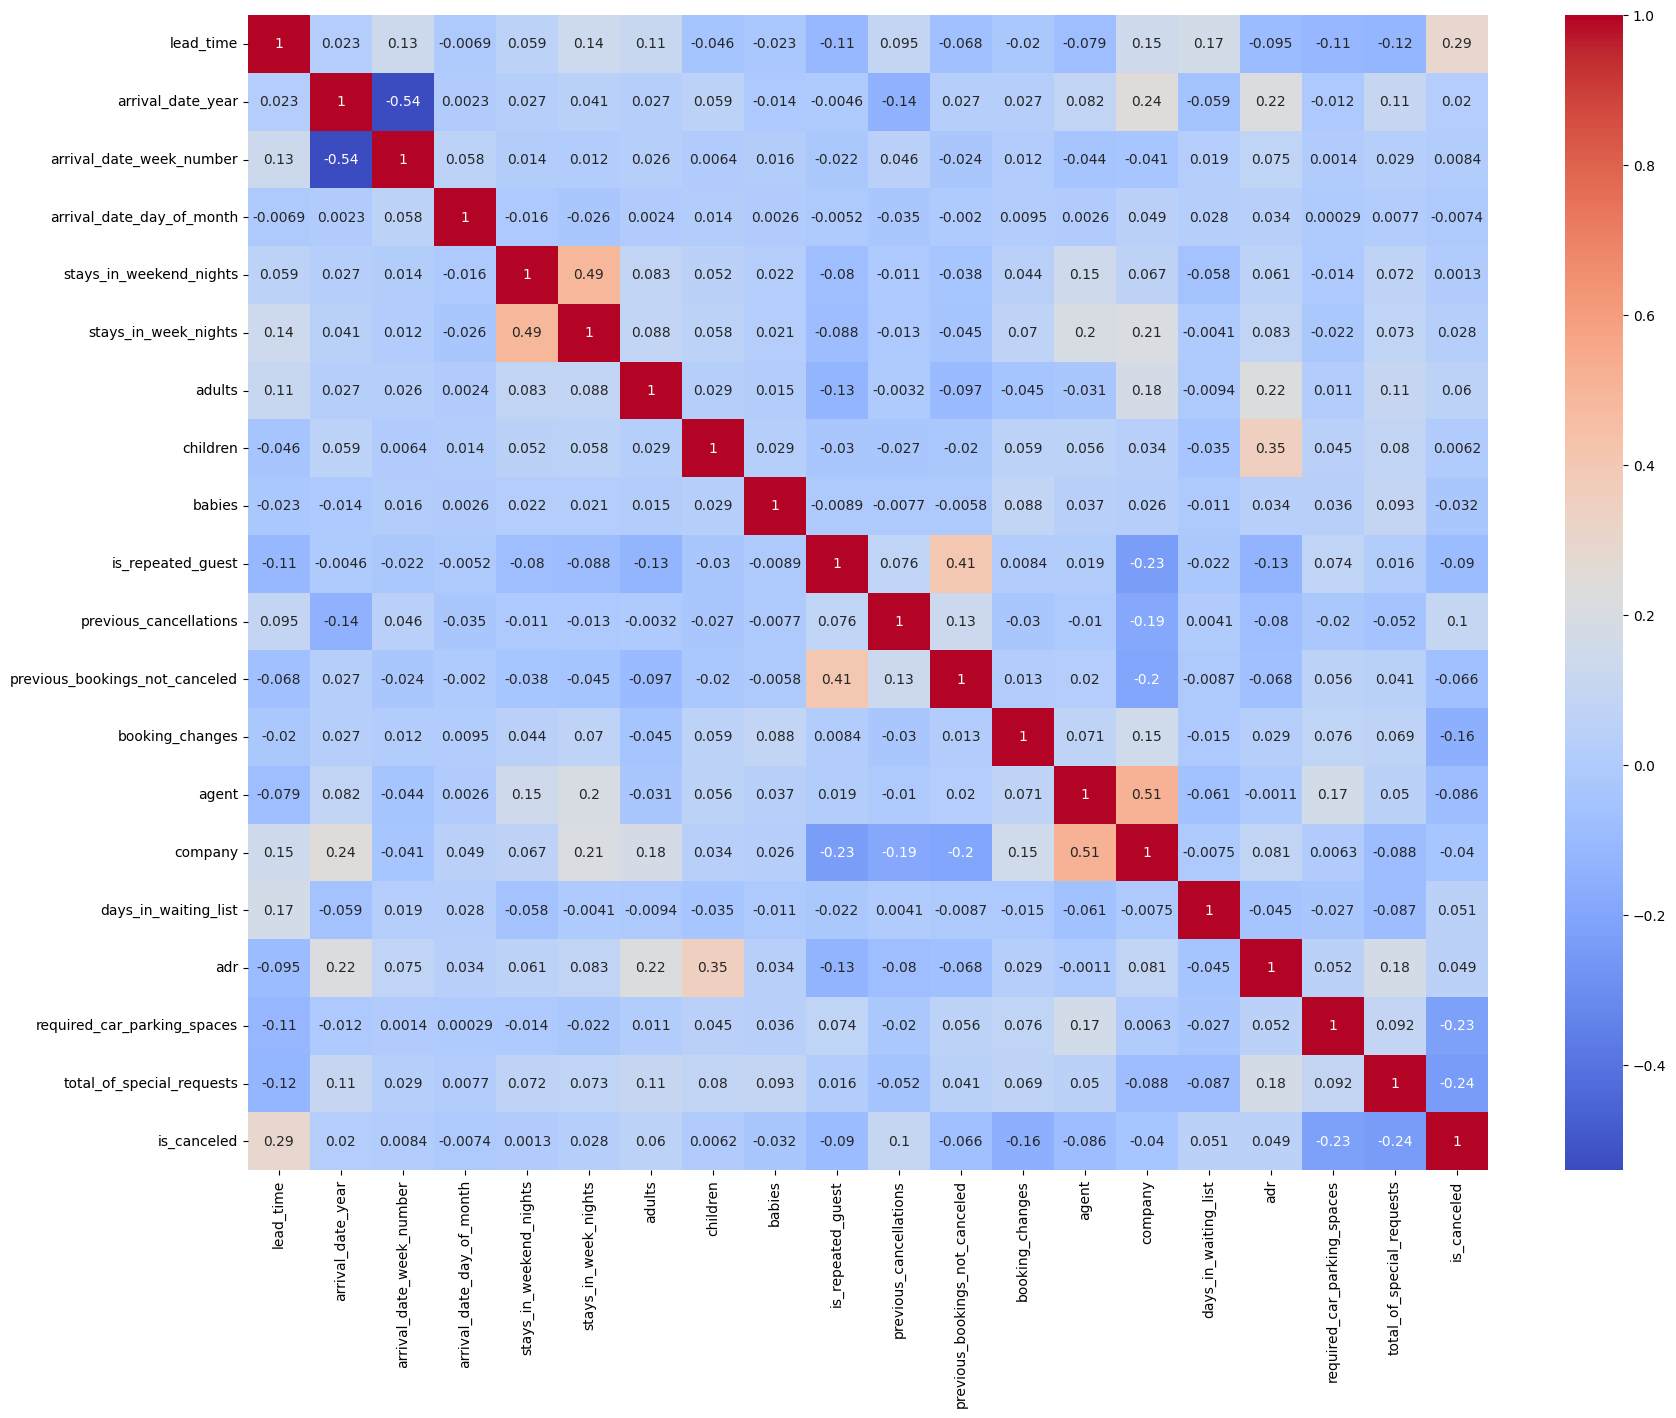

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(matriz_corr, annot = True, cmap='coolwarm')

Podemos analizar la relacion con la variable *target* y ordenarla para observar las variables más significativas.

In [ ]:
dataset.corrwith(dataset["is_canceled"]).sort_values()

<ipython-input-10-934b553c66b5>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corrwith(dataset["is_canceled"]).sort_values()


total_of_special_requests        -0.244997
required_car_parking_spaces      -0.225915
booking_changes                  -0.159315
is_repeated_guest                -0.090492
agent                            -0.086176
previous_bookings_not_canceled   -0.065868
company                          -0.040010
babies                           -0.032034
arrival_date_day_of_month        -0.007371
stays_in_weekend_nights           0.001279
children                          0.006242
arrival_date_week_number          0.008357
arrival_date_year                 0.019923
stays_in_week_nights              0.028439
adr                               0.049206
days_in_waiting_list              0.050827
adults                            0.060179
previous_cancellations            0.099613
lead_time                         0.293816
is_canceled                       1.000000
dtype: float64

Del anterior codigo podemos notar que aquellas variables cuantitativas que mayor correlación poseen con nuestra *target* son por un lado positivamente **lead_time** y negativamente **total_of_special_requests**. Sin embargo ambos valores siguen siendo en modulo relativamente bajos por lo que podemos decir que no tienen una fuerte correlación.
En los siguientes graficos veremos la distribución para cada uno

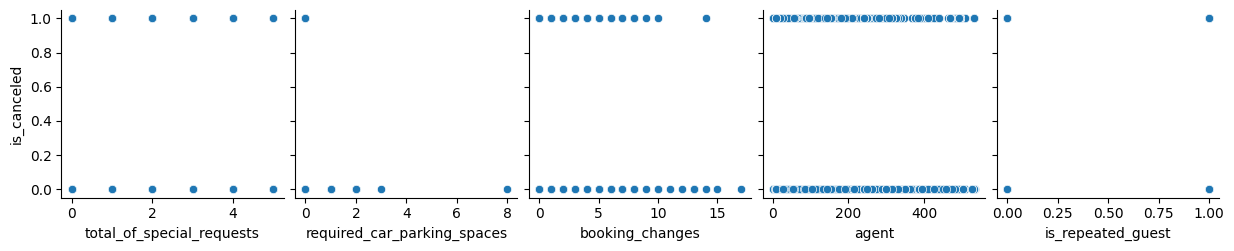

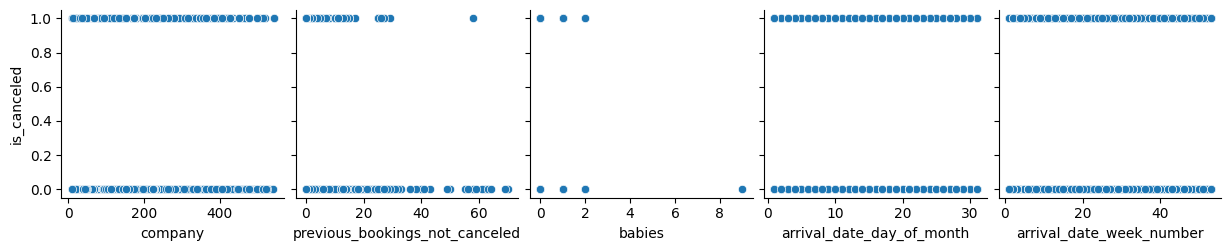

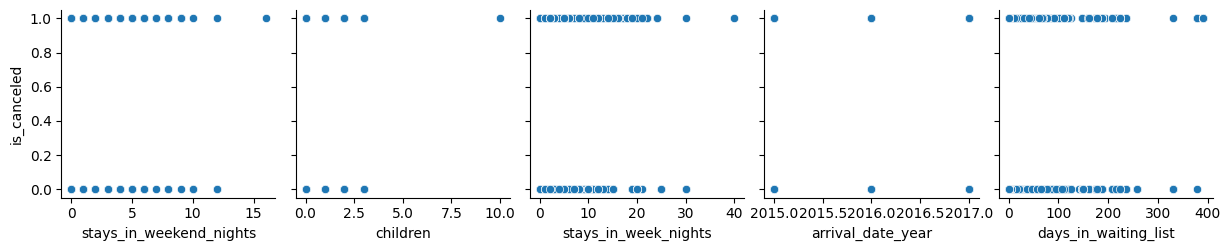

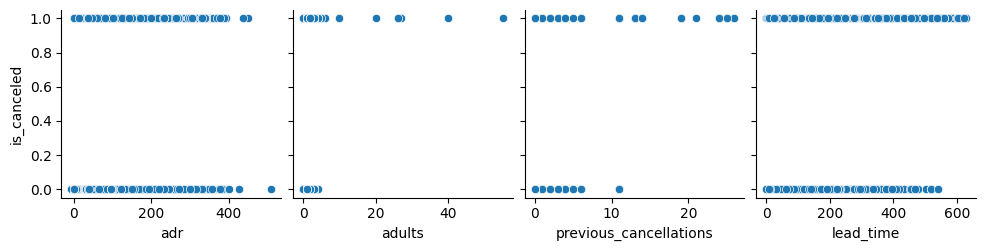

In [ ]:
# Dividimos las variables a graficar en grupos de 4/5 para así ubicarlas en distintos gráficos y que se aprecien mejor
x_vars1 = ["total_of_special_requests", "required_car_parking_spaces", "booking_changes", "agent", "is_repeated_guest"]
x_vars2 = ["company", "previous_bookings_not_canceled", "babies", "arrival_date_day_of_month", "arrival_date_week_number"]
x_vars3 = ["stays_in_weekend_nights", "children", "stays_in_week_nights", "arrival_date_year", "days_in_waiting_list"]
x_vars4 = ["adr", "adults", "previous_cancellations", "lead_time"]
sns.pairplot(dataset, y_vars = ["is_canceled"], x_vars = x_vars1)
sns.pairplot(dataset, y_vars = ["is_canceled"], x_vars = x_vars2)
sns.pairplot(dataset, y_vars = ["is_canceled"], x_vars = x_vars3)
sns.pairplot(dataset, y_vars = ["is_canceled"], x_vars = x_vars4)

Visualmente, podemos observar que, como nos indicaban los coeficientes de correlación de cada variable con ***is_canceled***, son pocas las relaciones que podemos encontrar de nuestro ***target*** respecto al resto de variables numéricas.

In [ ]:
def plot_percnt( column_name):
  ct = pd.crosstab(dataset[column_name], dataset['is_canceled'])
  ct_norm = ct.div(ct.sum(axis=1), axis=0) * 100
  ct_norm = ct_norm.reset_index()
  return ct_norm

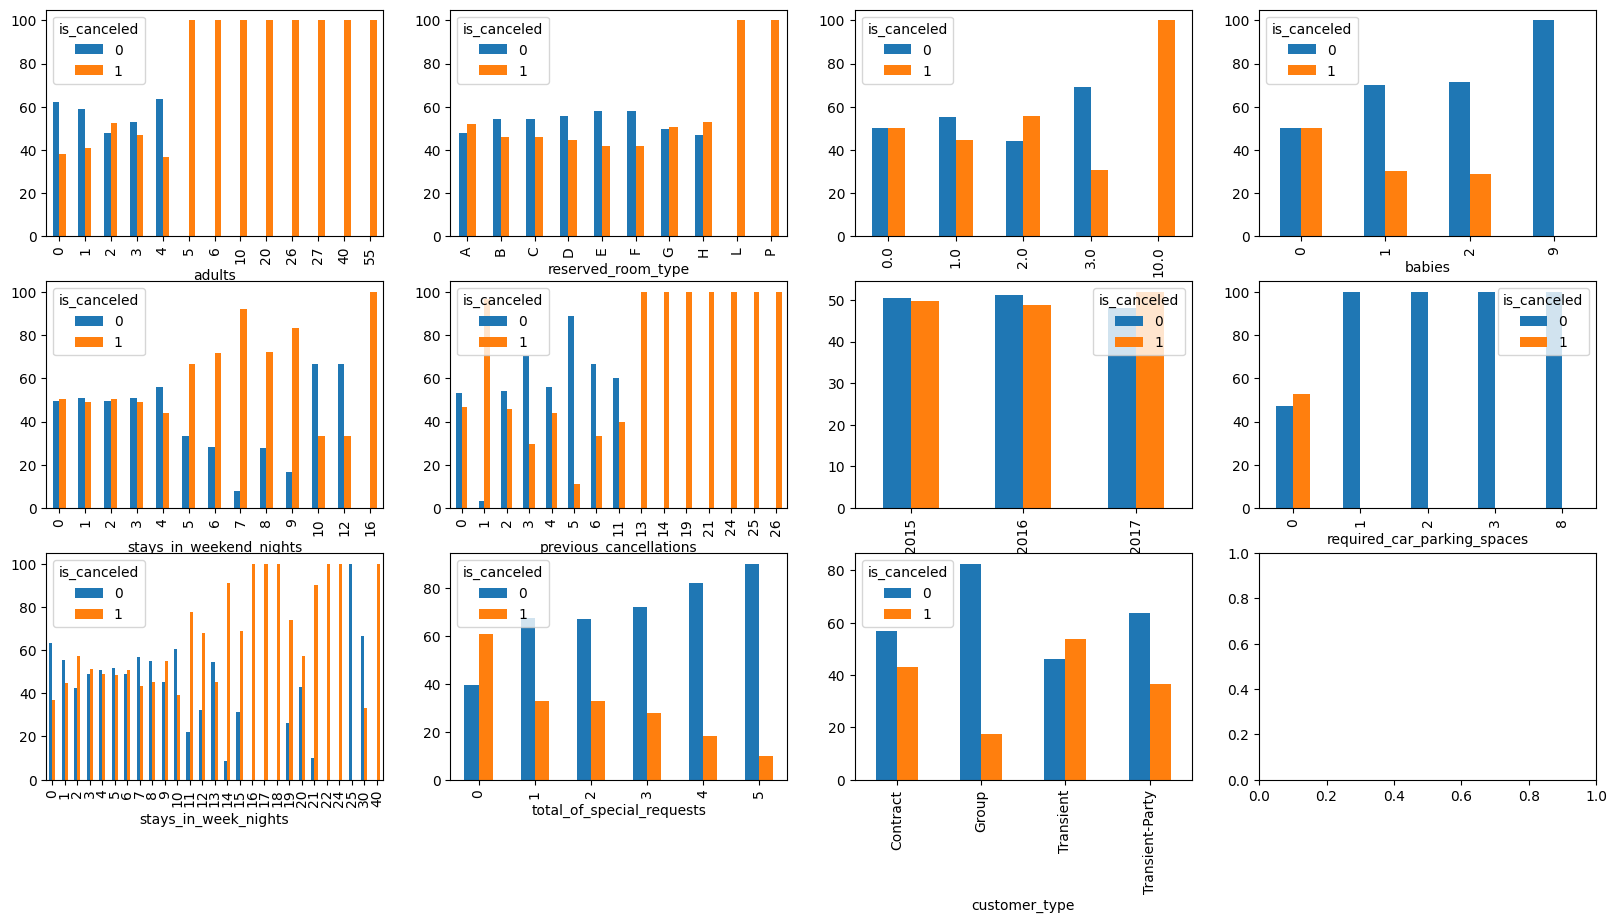

In [ ]:
fig1, ax = plt.subplots(3,4,figsize=(20,10))
plot_percnt("adults").plot(kind='bar', ax=ax[0,0], x = "adults")
plot_percnt("reserved_room_type").plot(kind='bar', ax=ax[0,1], x = "reserved_room_type")
plot_percnt("children").plot(kind='bar', ax=ax[0,2], x = "children")
plot_percnt("babies").plot(kind='bar', ax=ax[0,3], x = "babies")

plot_percnt("stays_in_weekend_nights").plot(kind='bar', ax=ax[1,0], x = "stays_in_weekend_nights")
plot_percnt("previous_cancellations").plot(kind='bar', ax=ax[1,1], x = "previous_cancellations")
plot_percnt("arrival_date_year").plot(kind='bar', ax=ax[1,2], x = "arrival_date_year")
plot_percnt("required_car_parking_spaces").plot(kind='bar', ax=ax[1,3], x = "required_car_parking_spaces")

plot_percnt("stays_in_week_nights").plot(kind='bar', ax=ax[2,0], x = "stays_in_week_nights")
plot_percnt("total_of_special_requests").plot(kind='bar', ax=ax[2,1], x = "total_of_special_requests")
plot_percnt("customer_type").plot(kind='bar', ax=ax[2,2], x = "customer_type")



plt.show()

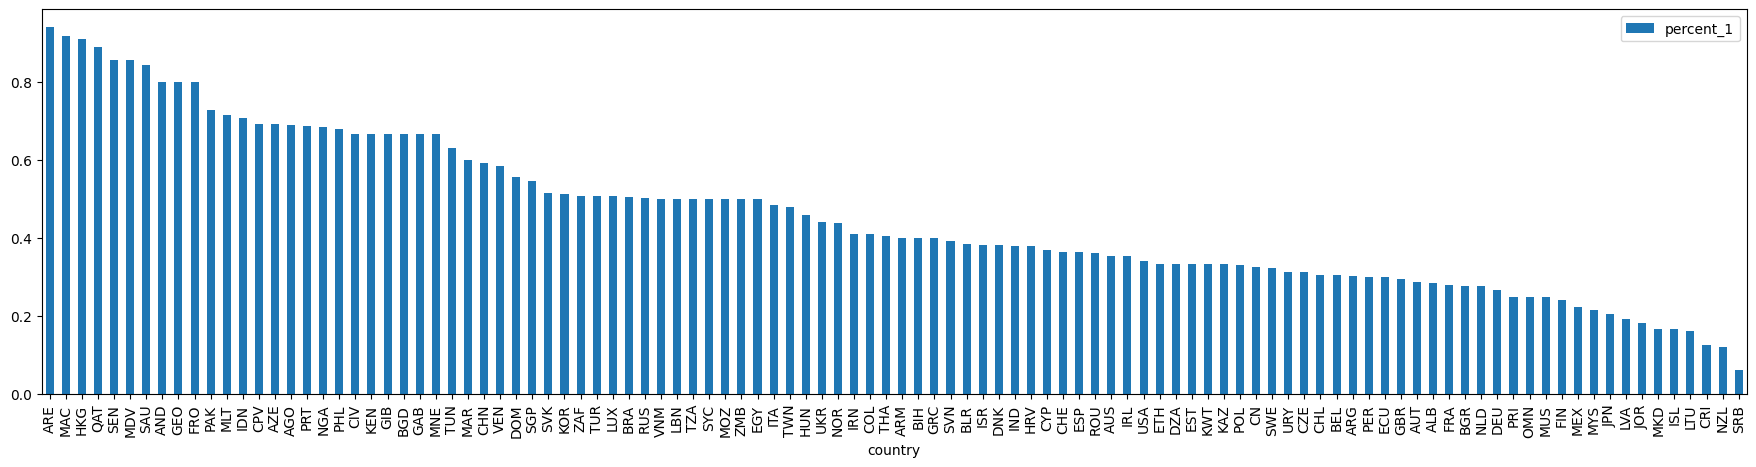

In [ ]:
# Agrupamos los datos por "country" y la columna "is_canceled", contamos las ocurrencias de cada valor
cancel_counts = dataset.groupby('country')['is_canceled'].value_counts()

# Convertimos la serie resultado a un dataframe y renombramos la columna 
cancel_df = cancel_counts.to_frame(name='counts')

# Resetamos el index para hacer a "country" y a "is_canceled" en columnas
cancel_df = cancel_df.reset_index()

cancel_pivot = cancel_df.pivot(index='country', columns='is_canceled', values='counts')

# Calculamos el porcentaje de 1 en la columna "is_canceled" por cada country 
cancel_pivot['percent_1'] = cancel_pivot[1] / (cancel_pivot[0] + cancel_pivot[1])

# Ordenamos el dataframe por porcentaje de 1s en orden descendiente 
cancel_pivot_sorted = cancel_pivot.sort_values(by='percent_1', ascending=False)
cancel_pivot_sorted = cancel_pivot_sorted.reset_index()
ax = cancel_pivot_sorted[cancel_pivot_sorted["percent_1"] > 0].plot(kind = "bar", x = "country", y="percent_1", figsize= (22,5))

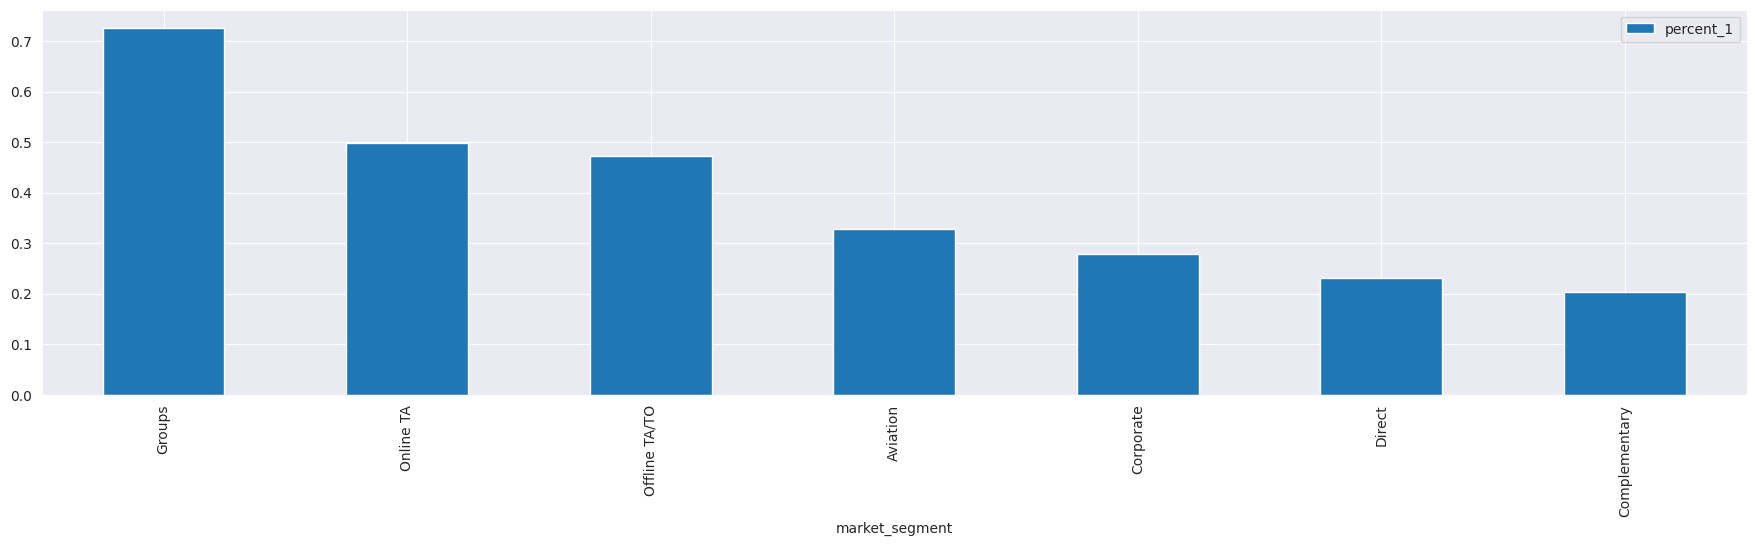

In [ ]:
# Agrupamos los datos por "market_segment" y la columna "is_canceled", contamos las ocurrencias de cada valor
cancel_counts = dataset.groupby('market_segment')['is_canceled'].value_counts()

# Convertimos la serie resultado a un dataframe y renombramos la columna 
cancel_df = cancel_counts.to_frame(name='counts')

# Resetamos el index para hacer a "market_segment" y a "is_canceled" en columnas
cancel_df = cancel_df.reset_index()

cancel_pivot = cancel_df.pivot(index='market_segment', columns='is_canceled', values='counts')

# Calculamos el porcentaje de 1 en la columna "is_canceled" por cada "market_segment" 
cancel_pivot['percent_1'] = cancel_pivot[1] / (cancel_pivot[0] + cancel_pivot[1])

# Ordenamos el dataframe por porcentaje de 1s en orden descendiente 
cancel_pivot_sorted = cancel_pivot.sort_values(by='percent_1', ascending=False)
cancel_pivot_sorted = cancel_pivot_sorted.reset_index()
ax = cancel_pivot_sorted[cancel_pivot_sorted["percent_1"] > 0].plot(kind = "bar", x = "market_segment", y="percent_1", figsize= (22,5))

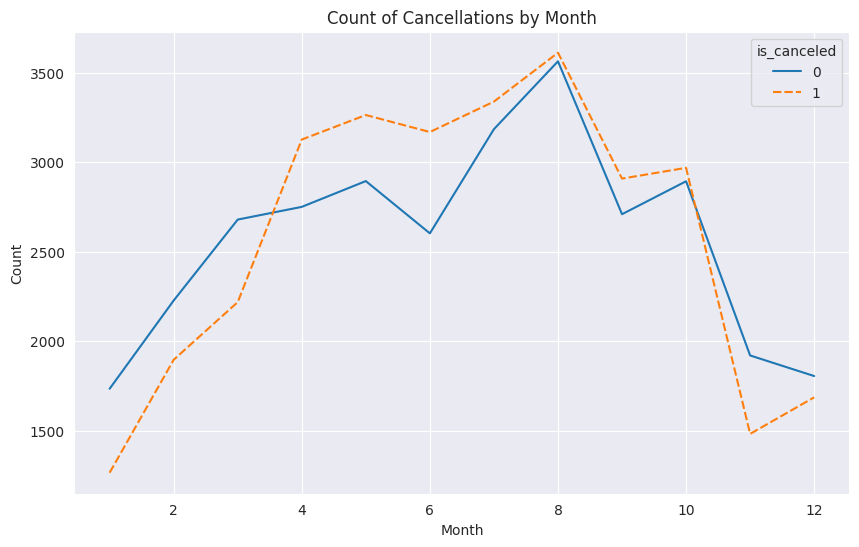

In [ ]:
# Creamos un diccionario para asignar a los meses un valor numerico 
month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Agregamos una nueva columna con un valor numerico para cada mes
dataset['month_num'] = dataset['arrival_date_month'].map(month_map)

#Ordenamos el dataframe por la nueva columna de valores numericos
dataset = dataset.sort_values('month_num')

# Agrupamos los datos por mes y la columna "is_canceled", contamos las ocurrencias de cada valor
cancel_counts = dataset.groupby(['month_num', 'is_canceled'])['is_canceled'].count()

# Convertimos la serie resultante en un daraframe y resetamos el indice 
cancel_df = cancel_counts.to_frame(name='count').reset_index()

# Filtramos el dataframe para incluir solo las filas en las que "is_canceled" es 0 o 1. 
cancel_df = cancel_df[cancel_df['is_canceled'].isin([0, 1])]

cancel_pivot = cancel_df.pivot(index='month_num', columns='is_canceled', values='count')

# Mostramos en un lineplot los 0s y 1s de "is_canceled" por cada mes 
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=cancel_pivot)
plt.title('Count of Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

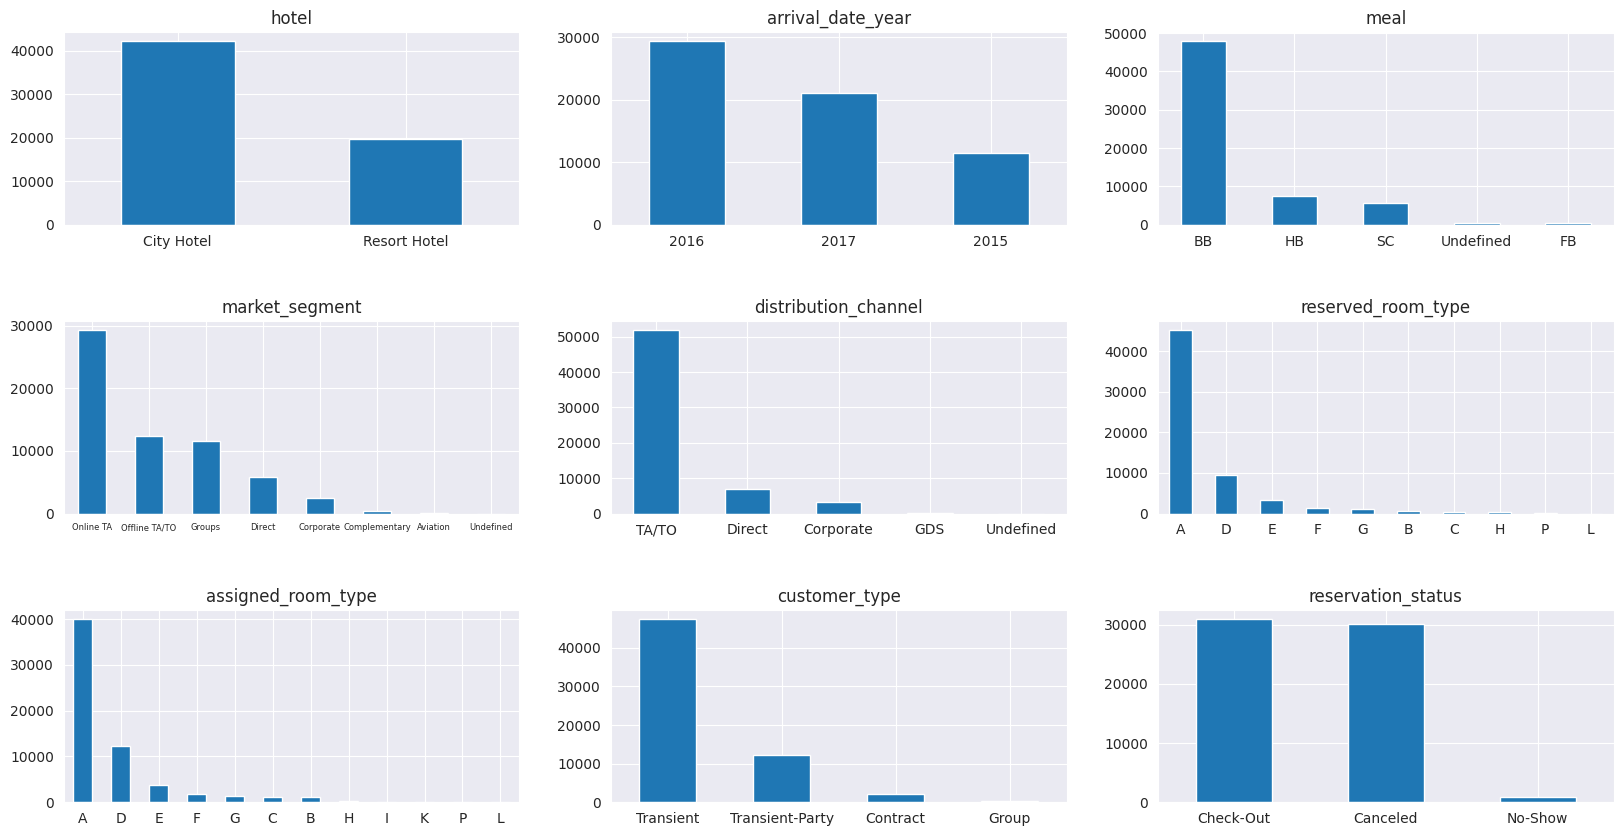

In [ ]:
object_columns = list(["hotel", "arrival_date_year", "meal", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "customer_type", "reservation_status"])

n_cols = len(object_columns)
n_rows = int(n_cols / 3) + (n_cols % 3 > 0)
fig, axes = plt.subplots(nrows = n_rows, ncols=3, figsize=(20, 10),gridspec_kw={'hspace': 0.5})

for i, col in enumerate(object_columns):
    row_idx = i // 3
    col_idx = i % 3
    ax = dataset[col].value_counts().plot(kind="bar",ax=axes[row_idx, col_idx])
    ax.set_title(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    if i == 3:
      ax.tick_params(axis='x', which='major', labelsize=6)

plt.show()

# Limpieza de datos


Para comenzar la limpieza de datos, buscaremos manejar los valores nulos dentro de nuestro dataset

In [ ]:
filas_totales = dataset.shape[0]
na_percnt = dataset.isna().sum()/filas_totales*100
na_percnt.to_frame()

,0
hotel,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000
children,0.006461


Notamos que solamente 4 columnas tienen valores nulos, estas son *children*, *country*, *agent* y *company*. Además, en dos de ellas (*children* y *country*), sus valores porcentuales son considerablemente bajos, mientras que en las otras dos (*agent* y *company*) ya hay valores que no pueden obviarse. Para visualizarlo mejor armemos un *bar graph* con los porcentajes de valores nulos de las cuatro variables.

<Axes: title={'center': 'Non-available values %'}, ylabel='%'>

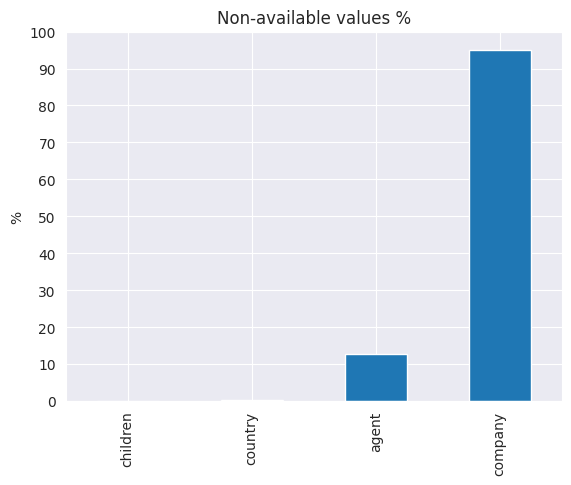

In [ ]:
#Creamos una lista con los valores a graficar
values_to_graph = na_percnt.get(["children", "country", "agent", "company"])
values_to_graph.plot.bar(ylabel = "%", yticks = range(0, 101, 10), title = "Non-available values %")

Podemos observar que los porcentaje de valores *'non-available'* tanto para *children* como para *country* son practicamente nulos, sin embargo, los de *agent* y *company* ya escalan a un nivel superior, siendo en *company* por poco la totalidad de los valos 'NA'.

Para *children* decidimos remplazar los valores por 0 ya que es el valor más frecuente y además solamente falta el 0.006461% por lo que es insignificante.
Luego, para *country*, *agent* y *company* en el paper aclara que no existen *missing values* y que debemos interpretarlos como *“not applicable”* por lo que decidimos en cada caso crear una categoria nueva.

In [ ]:
children_old = dataset["children"]
country_old = dataset["country"]
agent_old = dataset["agent"].astype(object)
company_old = dataset["company"].astype(object)

dataset["children"].fillna(0, inplace = True)
dataset["country"].fillna("NC",inplace = True)
dataset["agent"].fillna("-1",inplace = True)
dataset["company"].fillna("-1",inplace = True)
dataset["agent"] = dataset["agent"].astype(int).astype(str)
dataset["company"] = dataset["company"].astype(int).astype(str)

In [ ]:
dataset["agent"].replace(-1, 'NA')
dataset["company"].replace(-1, 'NC')
dataset["children"] = dataset["children"].astype(int)

Ahora comparemos la distribución de las variables antes y después de la imputación. Para eso a las variables no numéricas (*country*, *agent* y *company*) hay que transformarlas a valores que puedan ser comparables entre si. Para esto usaremos el *OrdinalEncoder*.

In [ ]:
print(pd.concat([agent_old,company_old,country_old],axis=1).describe())
print(dataset.describe(include = [object])[["agent","company","country"]])

          agent  company country
count   54023.0   3152.0   61913
unique    296.0    276.0     150
top         9.0     40.0     PRT
freq    17004.0    390.0   27950
        agent company country
count   61913   61913   61913
unique    297     277     150
top         9      -1     PRT
freq    17004   58761   27950


Nuevamente, las diferencias las encontramos en las variables *agent* y *company* para el caso de los conteos, en particular con *company* en donde cambia el valor de mayor apariciones (antes era -1, osea 'NA') con su respectiva frecuencia

# Análisis de Valores Atípicos

### Análisis Univariado

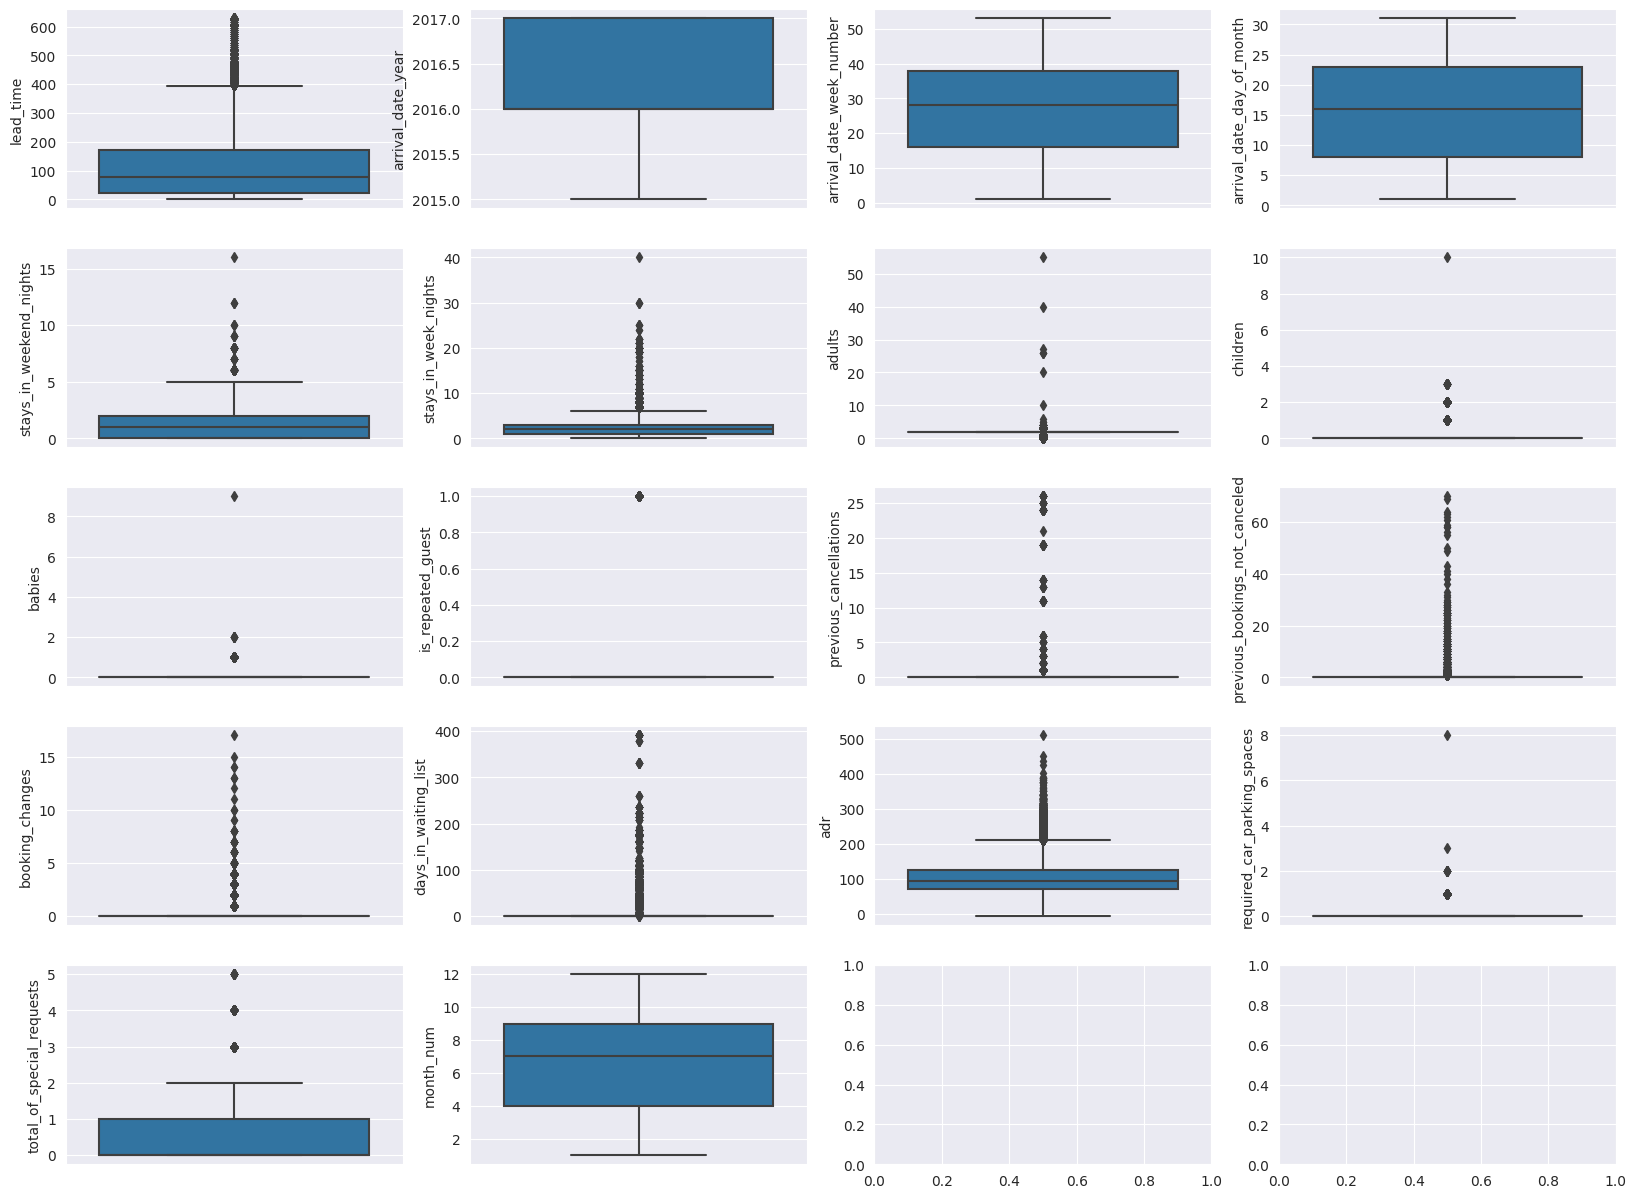

In [ ]:
fig1, ax = plt.subplots(5,4,figsize=(20,15))
columns_types = dataset.dtypes
cantidad = 0
iqr = []
outs_sup = []
outs_inf = []
columns = []
z_score = pd.DataFrame()
for column in dataset:
  if column != 'is_canceled' and (columns_types[column] == "float64" or columns_types[column] == "int64"):
    columns.append(column)
    sns.boxplot(y = dataset[column], ax= ax[cantidad//4,cantidad-4*(cantidad//4)])
    cantidad += 1

    #Cuartiles
    Q1 = np.quantile(dataset[column],0.25)
    Q3 = np.quantile(dataset[column],0.75)

    #Rango intercuartil
    IQR = Q3 - Q1

    #Limite superior Outliers
    out_sup = Q3 + 3*IQR
    out_inf = Q1 - 3*IQR
    iqr.append(IQR)
    outs_sup.append(out_sup)
    outs_inf.append(out_inf)

    meadian = np.mean(dataset[column])
    MAD=np.mean(np.absolute((dataset[column]-meadian)))
    z_score[column]=(dataset[column] - meadian)*0.6745/MAD

plt.show()

In [ ]:
boxplots_values = pd.DataFrame({ "columns": columns,"IQR": iqr, "outliers sup": outs_sup, "outliers inf": outs_inf})
boxplots_values = boxplots_values.set_index("columns").transpose()
boxplots_values

columns,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,month_num
IQR,149.0,1.0,22.0,15.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,1.0,5.0
outliers sup,619.0,2020.0,104.0,68.0,8.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,294.0,0.0,4.0,24.0
outliers inf,-424.0,2013.0,-50.0,-37.0,-6.0,-5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-98.0,0.0,-3.0,-11.0


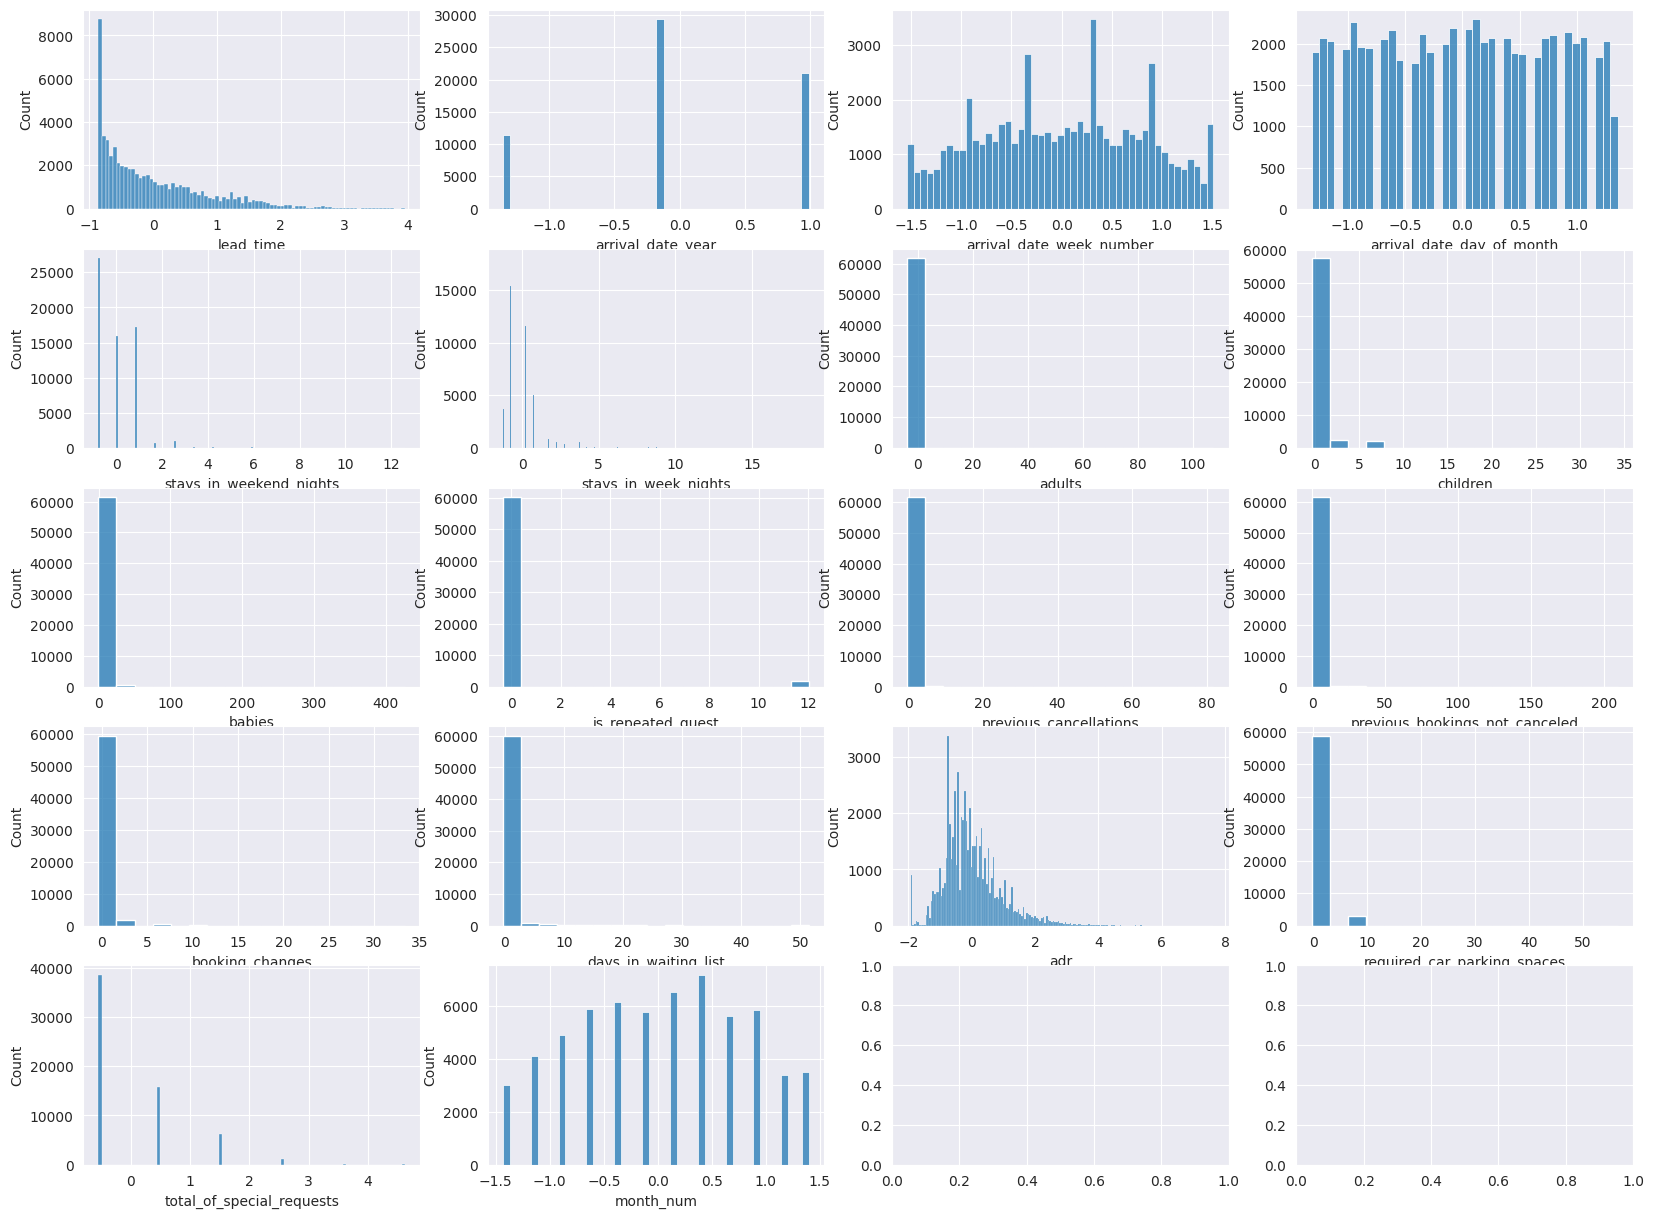

In [ ]:
z_score.sort_index()
fig1, ax = plt.subplots(5,4,figsize=(20,15))
cantidad = 0
for column in z_score:
  sns.histplot(z_score[column], ax = ax[cantidad//4,cantidad-4*(cantidad//4)])
  cantidad += 1
plt.show()

Para el analisis univariado de outliers con el z-score modificado decidimos utilziar como valor limite 3 y -3, para este set de datos ningun registro excede el -3 sin embargo para varias columnas si se supera el limite superior. Procederemos a analizar cada caso, determinando si efectivamente los outliers presentan información significativa.

In [ ]:
z_score = z_score.reset_index()
z_score[z_score["babies"] > 3].sort_values("babies")[["babies","index"]]

,babies,index
172,47.122044,2705
43041,47.122044,3018
42985,47.122044,16647
42810,47.122044,37535
42779,47.122044,37453
...,...,...
11351,94.583685,6675
45935,94.583685,47646
28197,94.583685,50487
33202,94.583685,38639


Podemos notar que si bien hay 428 registros cuyo z-score excede el limite que decidimos para determinar outliers, solamente el último registro tiene sentido pensarlo como extraño ya que para los valores de z-score de 47.12 y 94.58 estamos tratando de 1 y 2 bebes, mientras que el de z-score de 426.81 es de 9 bebes por lo que decidimos eliminarlo del dataset.

In [ ]:
dataset = dataset.drop(dataset[dataset["babies"] == 9].index)
dataset[dataset["babies"] == 9]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled,month_num


In [ ]:
z_score[z_score["required_car_parking_spaces"] > 3].sort_values("required_car_parking_spaces")[["required_car_parking_spaces","index"]]

,required_car_parking_spaces,index
11,6.748370,49059
40971,6.748370,10091
40972,6.748370,28003
40980,6.748370,27926
40995,6.748370,8771
...,...,...
37950,13.851597,51270
33549,13.851597,14389
23041,13.851597,2168
29383,20.954824,13713


Para el caso de la columna *required_car_parking_spaces* notamos algo similar a babies, si bien hay 3072 filas de potenciales outliers realmente podemos considerar uno solo como outlier por la magnitud del mismo y este es el registro 8269 que para la columna posee un valor de 8. 

In [ ]:
dataset = dataset.drop(dataset[dataset["required_car_parking_spaces"] == 8].index)
dataset[dataset["required_car_parking_spaces"] == 8]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled,month_num


### Análisis Multivariado

In [ ]:
# Cargamos un nuevo dataframe con loas variables cuantitativas
multivariado = pd.DataFrame()
for column in dataset:
  if columns_types[column] == "float64" or columns_types[column] == "int64":
    multivariado[column] = dataset[column]

Busquemos outliers entre dos variables que tengan cierto grado de relación entre si. Para eso usamos los pares de variables:
 - *stays_in_week_nights* - *stays_in_weekend_nights*
 - *lead_time* - *days_in_waiting_list*

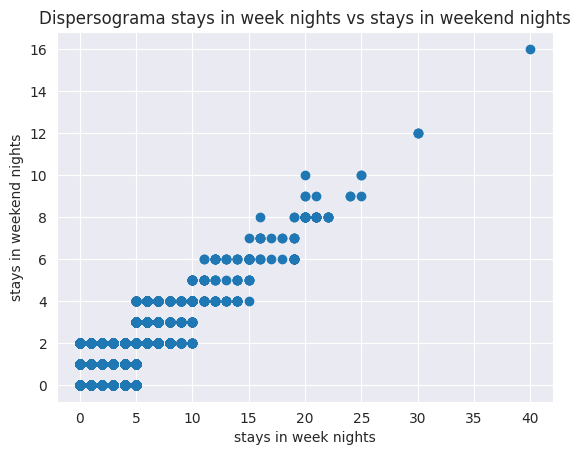

In [ ]:
#Scatter Plot
plt.scatter(multivariado["stays_in_week_nights"],multivariado["stays_in_weekend_nights"])
plt.title('Dispersograma stays in week nights vs stays in weekend nights')
plt.xlabel('stays in week nights')
plt.ylabel('stays in weekend nights')
plt.show()

El gráfico nos muestra cierta covarianza entre las variables, lo que tiene sentido si se tiene en cuenta que, por ejemplo, si una persona se queda una semana entera en el hotel, estaría quedandose 5 días en la semana y 2 días en el fin de semana. No se encuentran outliers.

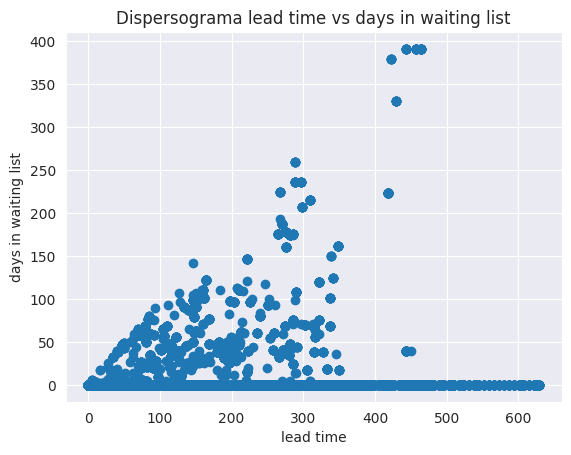

In [ ]:
#Scatter Plot
plt.scatter(multivariado["lead_time"],multivariado["days_in_waiting_list"])
plt.title('Dispersograma lead time vs days in waiting list')
plt.xlabel('lead time')
plt.ylabel('days in waiting list')
plt.show()

Este par de variables se encuentran más dispersas que el par anterior, y se encuentran valores que parecen estar aislados del sector de mayor densidad.
Usamos el metodo LOF (Local Outlier Factor) para identificar aquellos posibles outliers que se alejan de éstas zonas de mayor densidad.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

multivariadoLOF = pd.DataFrame({'lead_time': multivariado['lead_time'], 'days_in_waiting_list': multivariado['days_in_waiting_list']})

X = multivariado[['lead_time','days_in_waiting_list']].values

clf = LocalOutlierFactor(n_neighbors=20)
clf.fit(X)
y_pred = clf.fit_predict(X)
scores = clf.negative_outlier_factor_

multivariadoLOF['scores'] = scores

multivariadoLOF.sort_values('scores')

# multivariadoLOF

,lead_time,days_in_waiting_list,scores
28696,146,142,-2.758623e+11
39555,246,117,-2.175052e+11
29990,249,20,-2.000000e+11
19224,184,111,-1.910497e+11
11111,221,121,-1.338078e+11
...,...,...,...
27025,545,0,-9.384874e-01
1583,545,0,-9.384874e-01
27871,545,0,-9.384874e-01
39209,545,0,-9.384874e-01


<ipython-input-119-e3fc3c518080>:10: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [10]
<ipython-input-119-e3fc3c518080>:11: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


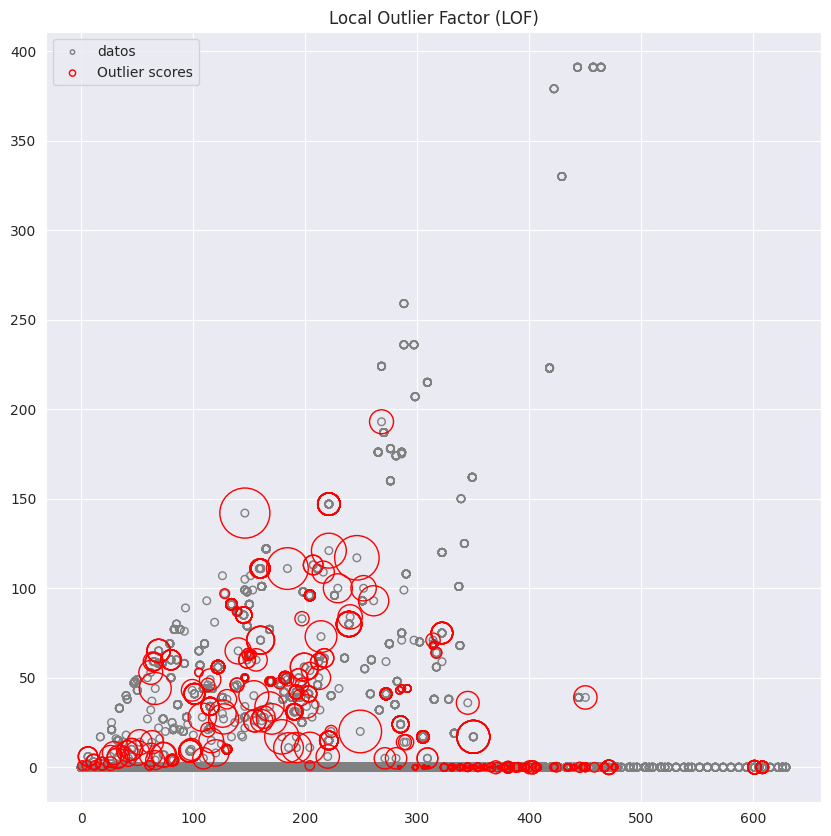

In [ ]:
#Calculo radio para plotear score
radius = (multivariadoLOF.scores.max() - multivariadoLOF.scores) / (multivariadoLOF.scores.max() - multivariadoLOF.scores.min())

#Grafico LOF
plt.figure(figsize=(10,10))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(multivariadoLOF.lead_time.values,multivariadoLOF.days_in_waiting_list.values, edgecolor='grey', s=30, label='datos',facecolors='none')
plt.scatter(multivariadoLOF.lead_time.values,multivariadoLOF.days_in_waiting_list.values, s=1300 * radius, edgecolors='red',facecolors='none', label='Outlier scores')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [ ]:
multivariadoLOF[multivariadoLOF['lead_time'] < multivariadoLOF['days_in_waiting_list']]

,lead_time,days_in_waiting_list,scores


Si bien usando el método se identifican ciertos outliers, como ningun registro contempla un valor mayor en *days_in_waiting_list* que en *lead_time*, son valores posibles y que creemos no deberían eliminarse del dataset.

Analizaremos a continuación la variación frente a la cantidad de adultos de distintas variables

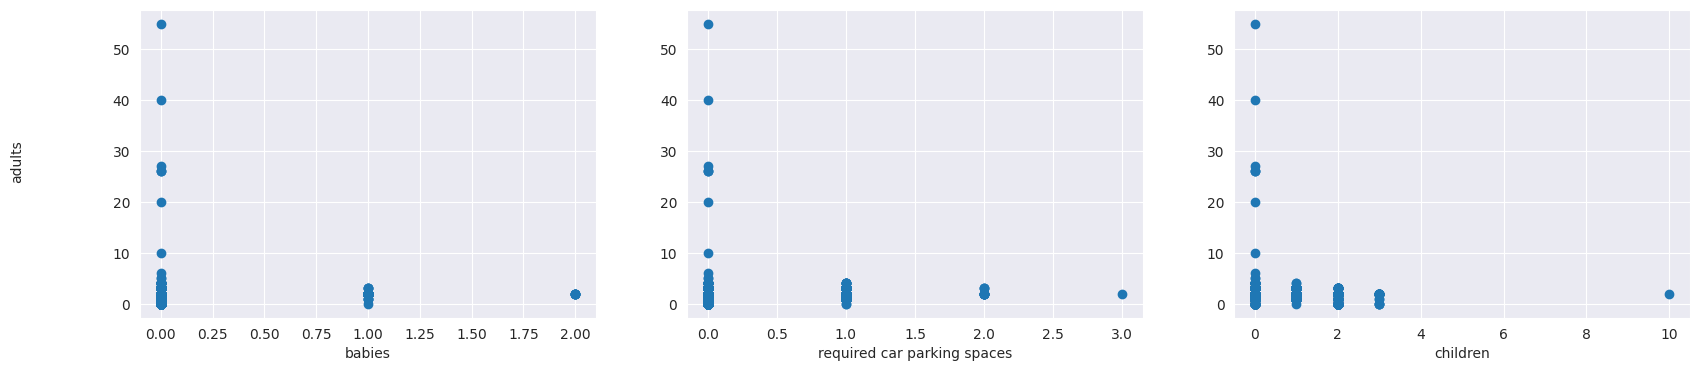

In [ ]:
#Scatter Plot
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

axs[0].scatter(multivariado["babies"],multivariado["adults"])
axs[0].set_xlabel('babies')

axs[1].scatter(multivariado["required_car_parking_spaces"],multivariado["adults"])
axs[1].set_xlabel('required car parking spaces')

axs[2].scatter(multivariado["children"],multivariado["adults"])
axs[2].set_xlabel('children')

fig.text(0.06, 0.5, 'adults', va='center', rotation='vertical')

plt.show()

De los ultimos 3 graficos notamos que al considerar la relación *adults - children*, *adults - babies* y *adults - required car parking spaces*, uno podría esperar que exista una correlación lineal entre ambos ya que un aumento de la cantidad de adultos implica generalmente una aumento en la cantidad de niños y también de autos utilizados. Sin embargo de los graficos podemos observar que esto no sucede y no solo no existe tal relación sino que para muchos casos con 0 adultos tenemos que se solicitaron espacios o que hay reservas para niños sin adultos lo cual nos indica que hubo un problema en la carga de la información